# Auto ARIMA using Pyramid ARIMA Python Package

* Ref: [https://datafai.com/auto-arima-using-pyramid-arima-python-package/](https://datafai.com/auto-arima-using-pyramid-arima-python-package/)
* Data: 用 seaborn 中的 flights data

In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 8.7MB 16.7MB/s 
     |████████████████████████████████| 808kB 47.7MB/s 
     |████████████████████████████████| 2.1MB 46.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.0
    Uninstalling setuptools-50.3.0:
      Successfully uninstalled setuptools-50.3.0
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [5]:
import numpy
import pandas
import pip
import pmdarima
import scipy
import sklearn
import statsmodels
import sys

In [7]:
print(numpy.__version__)
print(pandas.__version__)
print(pip.__version__)
print(pmdarima.__version__)
print(scipy.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)
print(sys.version)

1.18.5
1.1.2
19.3.1
1.7.1
1.4.1
0.22.2.post1
0.11.1
3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import itertools
import scipy
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from pmdarima.arima import auto_arima
from sklearn import metrics

## 1. Load data

In [11]:
df_flight = sns.load_dataset('flights')
df_flight.head()
df_flight.info()
df_flight.shape
df_flight.describe()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [12]:
df_pivot = df_flight.pivot(index='month',
                           columns='year',
                           values='passengers')
df_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Figure size 720x360 with 0 Axes>

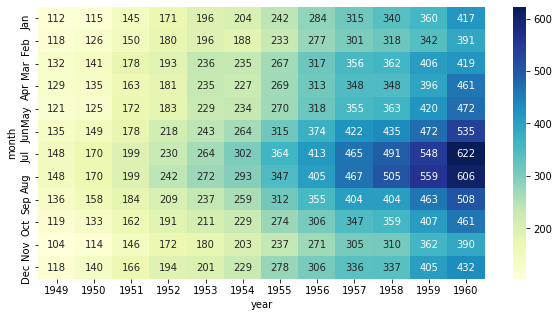

In [16]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [17]:
month = pd.date_range('19490131', periods=144, freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [18]:
df_flight['datestamp'] = month
df_flight.head()

,year,month,passengers,datestamp
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [19]:
df_flight = df_flight.loc[:, ('datestamp', 'passengers')]
df_flight.head()
df_flight.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [20]:
df_flight.set_index('datestamp', inplace=True)
df_flight.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Passengers in 1000')

Text(0.5, 1.0, '# of Passengers over time')

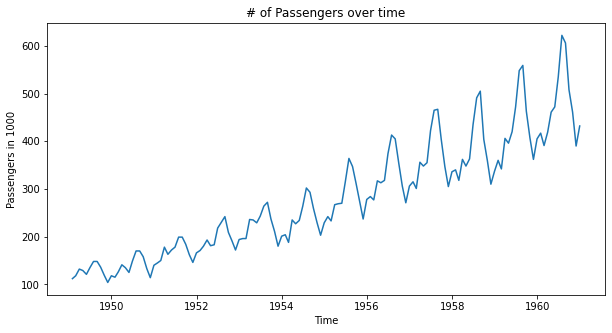

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df_flight)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000')
plt.title('# of Passengers over time')
plt.show()

In [22]:
decomposition = seasonal_decompose(df_flight, model='multiplicative')

<Figure size 1440x720 with 0 Axes>

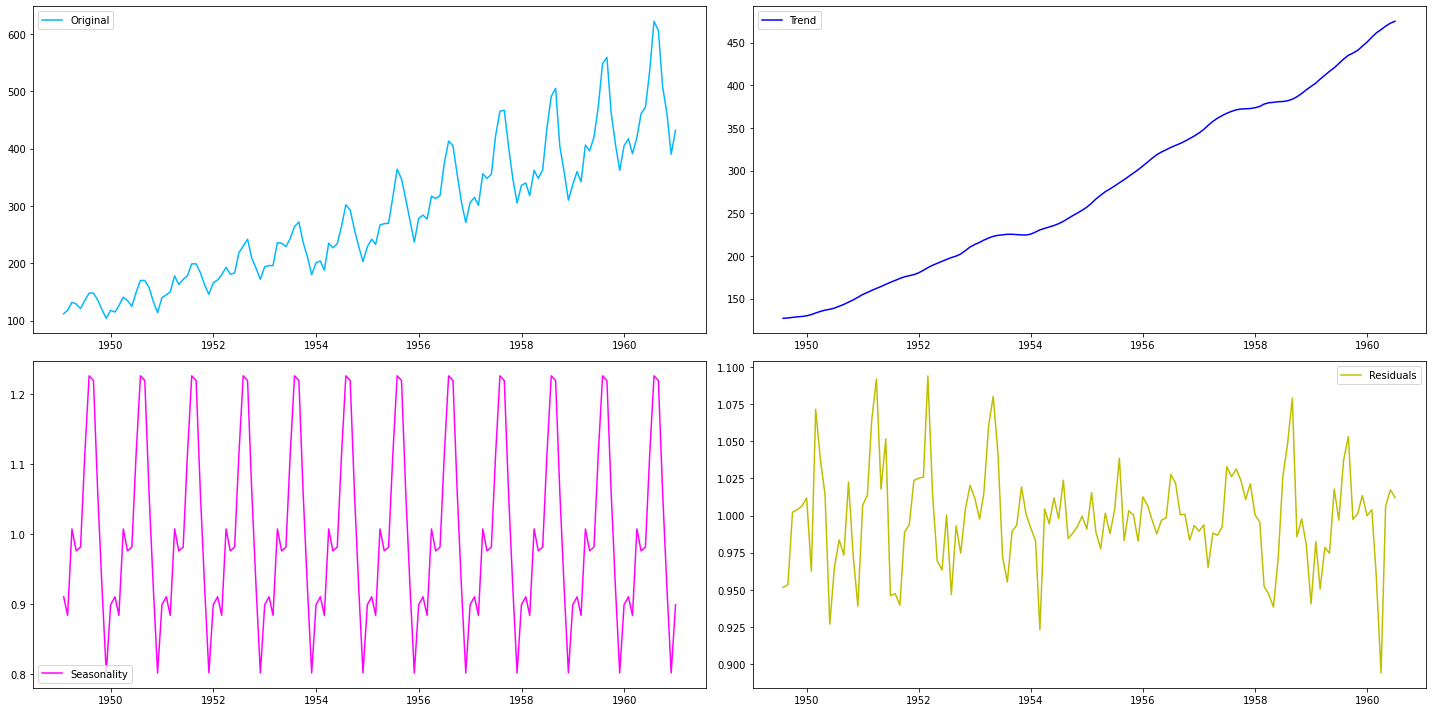

In [24]:
plt.figure(figsize=(20, 10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(df_flight, color='#00b8ff', label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color='#ff00ff', label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [25]:
decomposition = seasonal_decompose(df_flight, model='additvie')

<Figure size 1440x720 with 0 Axes>

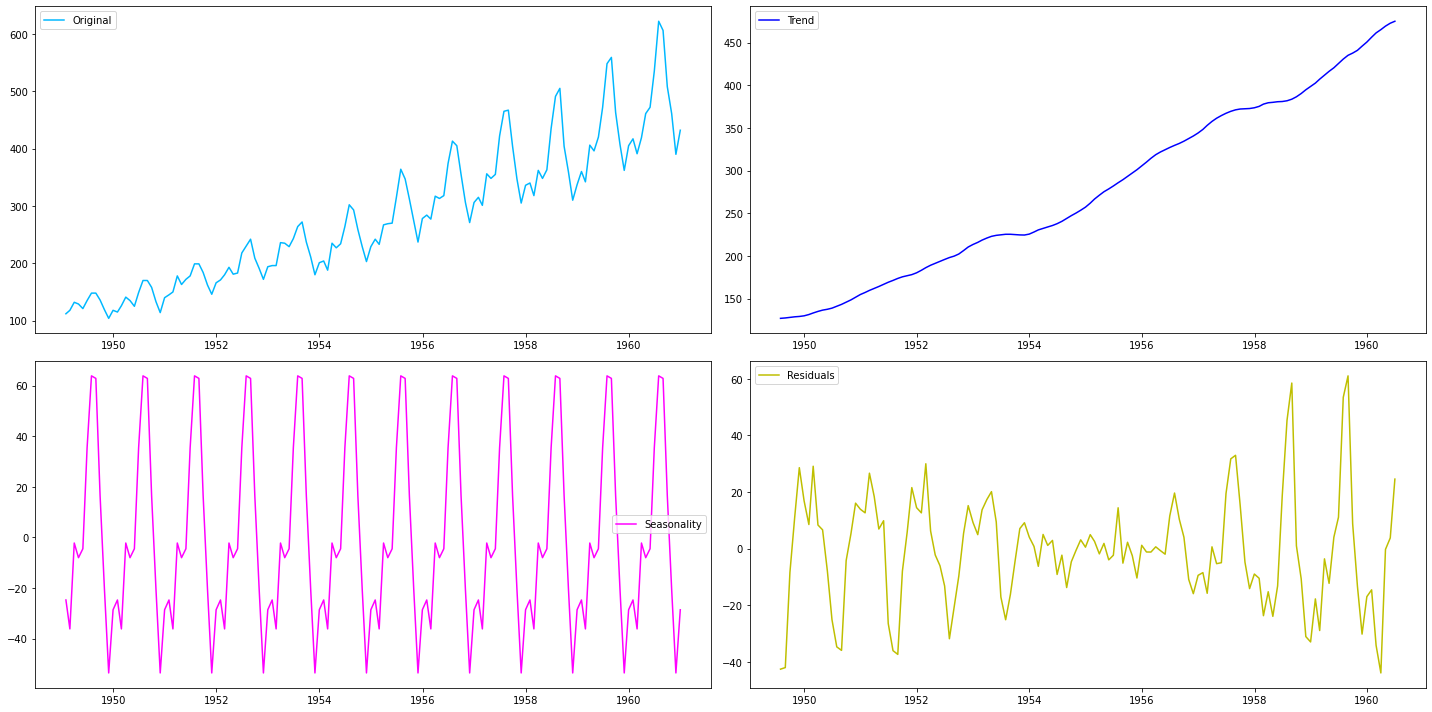

In [26]:
plt.figure(figsize=(20, 10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(df_flight, color='#00b8ff', label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color='#ff00ff', label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [27]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df_flight)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.01, False)

In [28]:
df_train, df_test = df_flight[:100], df_flight[100:]
df_train.shape
df_test.shape

(100, 1)

(44, 1)

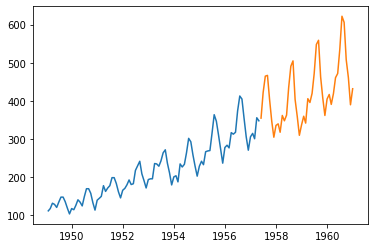

In [29]:
plt.plot(df_train)
plt.plot(df_test)
plt.show()

In [30]:
model = auto_arima(df_train,
                   start_p=1, max_p=8,
                   start_q=1, max_q=8,
                   start_P=0, max_P=8,
                   start_Q=0, max_Q=8,
                   d=1, D=1,
                   m=12, seasonal=True,
                   trace=True,
                   error_action='warn',
                   suppress_warning=True,
                   stepwise=True,
                   random_state=20,
                   n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=647.341, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.48 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.28 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.10 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.25 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.16 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.45 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -319.101
Date:                            Fri, 02 Oct 2020   AIC                            644.203
Time:                                    22:14:20   BIC                            651.601
Sample:                                         0   HQIC                           647.182
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2434      0.097     -2.512      0.012      -0.433      -0.054
ar.S.L12      -0.2127      0.087     -2.432      0.015      -0.384      -0.041
sigma2        89.1842     14.080      6.334      0.000      61.587     116.781
===================================================================================
Ljung-Box (Q):                       39.35   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.50   Prob(JB):                         0.30
Heteroskedasticity (H):               1.32   Skew:                             0.40
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
df_pred = pd.DataFrame(model.predict(n_periods=44),
                       index=df_test.index)
df_pred.columns=['Predicted Passengers']

<Figure size 720x360 with 0 Axes>

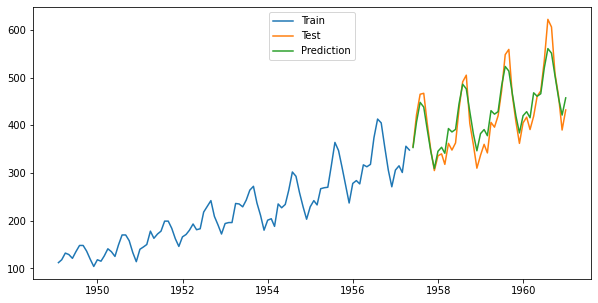

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')
plt.plot(df_pred, label='Prediction')
plt.legend(loc='upper center')
plt.show()

In [36]:
df_test['Predicted Passengers'] = df_pred
df_test['Error'] = df_test['passengers'] - df_test['Predicted Passengers']
df_test.head()

,passengers,Predicted Passengers,Error
datestamp,,,
1957-05-31,355,353.433649,1.566351
1957-06-30,422,406.781321,15.218679
1957-07-31,465,447.984392,17.015608
1957-08-31,467,438.051605,28.948395
1957-09-30,404,391.246543,12.753457


In [38]:
metrics.mean_absolute_error(df_test['passengers'], df_test['Predicted Passengers'])

21.538631315448086

In [39]:
metrics.mean_squared_error(df_test['passengers'], df_test['Predicted Passengers'])

686.7476377579497

In [40]:
metrics.median_absolute_error(df_test['passengers'], df_test['Predicted Passengers'])

22.334088623973173

<Figure size 1008x360 with 0 Axes>

Text(0.5, 1.0, 'Error distribution over time')

((array([-2.15374952, -1.77530174, -1.55088744, -1.38514138, -1.25057432,
         -1.1354892 , -1.03375442, -0.94172868, -0.85705923, -0.7781294 ,
         -0.70377435, -0.63312213, -0.5654989 , -0.50036931, -0.43729746,
         -0.3759202 , -0.31592847, -0.25705362, -0.19905725, -0.14172333,
         -0.08485191, -0.02825382,  0.02825382,  0.08485191,  0.14172333,
          0.19905725,  0.25705362,  0.31592847,  0.3759202 ,  0.43729746,
          0.50036931,  0.5654989 ,  0.63312213,  0.70377435,  0.7781294 ,
          0.85705923,  0.94172868,  1.03375442,  1.1354892 ,  1.25057432,
          1.38514138,  1.55088744,  1.77530174,  2.15374952]),
  array([-49.01296211, -45.4397642 , -37.94722117, -36.43507989,
         -36.10959734, -31.3216818 , -31.09644078, -30.9374089 ,
         -28.28863508, -27.26758272, -25.37181726, -24.92863068,
         -24.66913268, -24.5977592 , -23.28686715, -22.76978127,
         -21.89839598, -14.96081034, -13.79800493, -12.25232959,
         -11.4295892

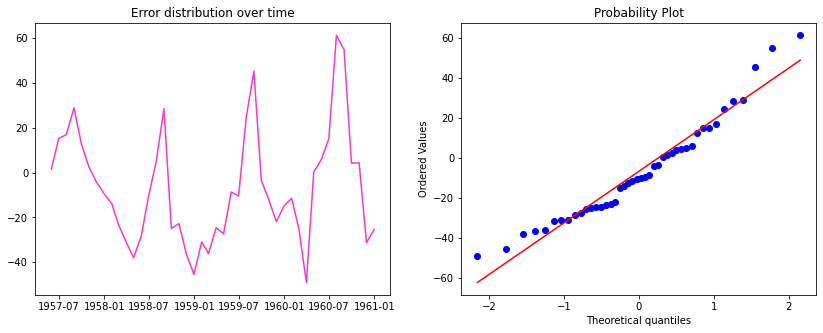

In [45]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(df_test['Error'], color='#ff33CC')
plt.title('Error distribution over time')

plt.subplot(122)
scipy.stats.probplot(df_test['Error'], plot=plt)
plt.show()

<Figure size 1080x360 with 0 Axes>

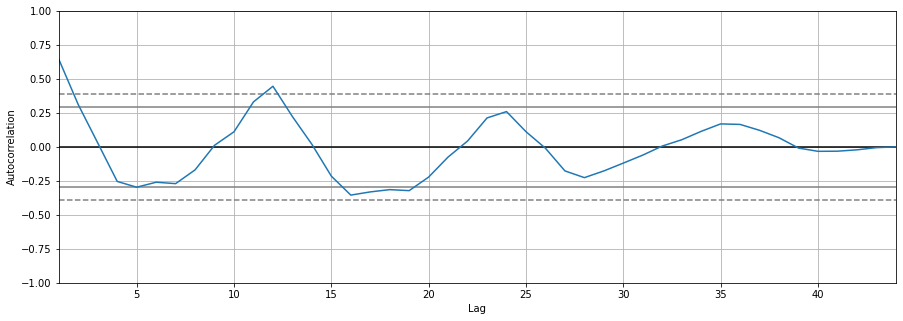

In [46]:
plt.figure(figsize=(15, 5))
pm.autocorr_plot(df_test['Error'])
plt.show()